In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import optimize
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace import tools

In [9]:
ar_params = np.array([0.5])
ma_params = np.array([0.7])

ar = np.r_[1,-ar_params]
ma = np.r_[1,ma_params]

In [10]:
ma_process = ArmaProcess(ar,ma)
np.random.seed(9999)

X = ma_process.generate_sample(nsample=2500)

In [11]:
def plot_series(X): 
    """ Plots the time series data X.

    Args:
        X (np.array): Time-series data
    """

    fig = plt.figure(figsize=(16, 6))
    plt.plot(X, linewidth=3)
    plt.title('Time Series Plot', fontsize=15)
    plt.xlabel('Time', fontsize=13)
    plt.ylabel('Value of X', fontsize=13)
    plt.grid()
    plt.show()

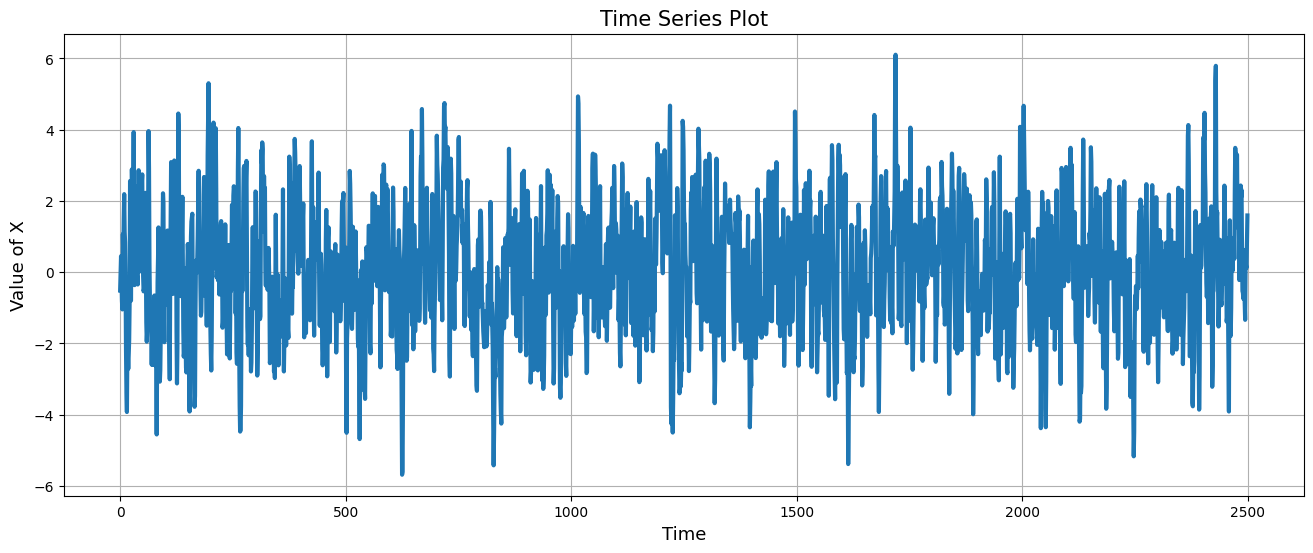

In [12]:
plot_series(X)

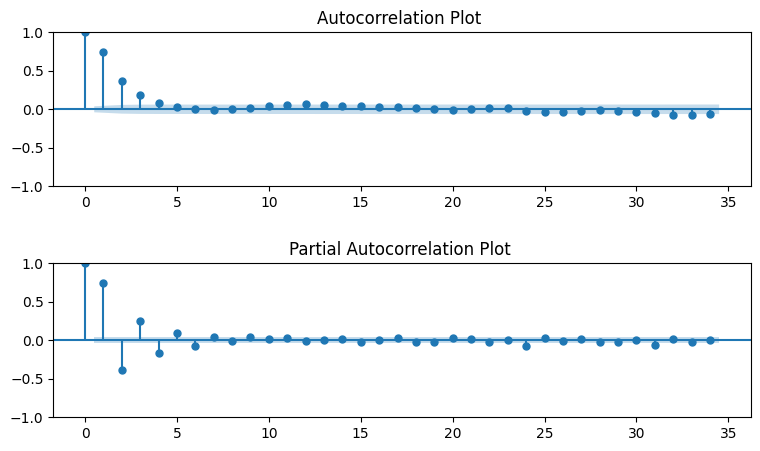

In [13]:
def plot_graphs(ar_params=None, ma_params=None, X=None):
    """ Plots ACF and PACF graphs
        
        It takes in the time series data and plots the ACF and PACF graphs for 
        the series. When the time series is not provided but it generates the 
        time-series using the params and generates data. Then, the ACF and PACF 
        graphs are plotted for the generated samples.

    Args:
        ar_params (np.array): AR parameters - (phi1, phi2, ...)
        ma_params (np.array): MA parameters - (theta1, theta2, ...)
        X (np.array): Time-series data 

    """
    
    title = 'Autocorrelation Plot '
    
    if X is None:
        ar = np.r_[1, -ar_params]
        ma = np.r_[1, ma_params] 
        arma_process = ArmaProcess(ar=ar, ma=ma) 
        X = arma_process.generate_sample(nsample=10000) 
        
        title += ' for ARMA model : AR={} MA={}'.format(str(ar_params), str(ma_params)) 
        
    fig = plt.figure(figsize=(9, 5))
    fig.subplots_adjust(hspace=0.5)

    # ACF plot
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, title=title, ax=ax1)

    # PACF plot
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, title='Partial ' + title, ax=ax2)
    
    plt.show()

plot_graphs(X=X)

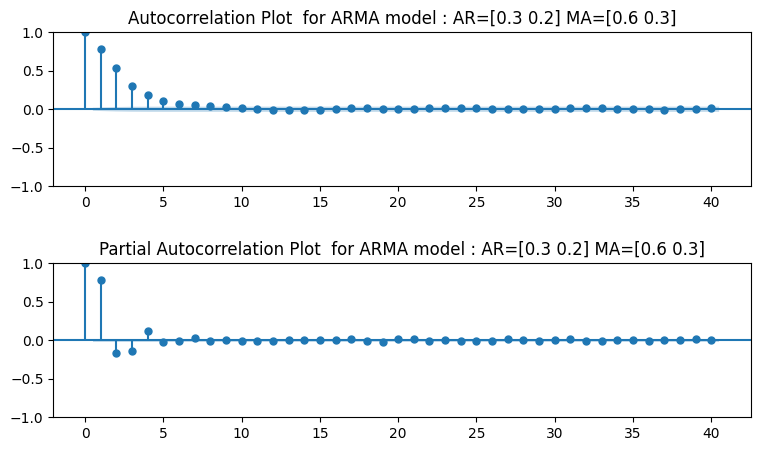

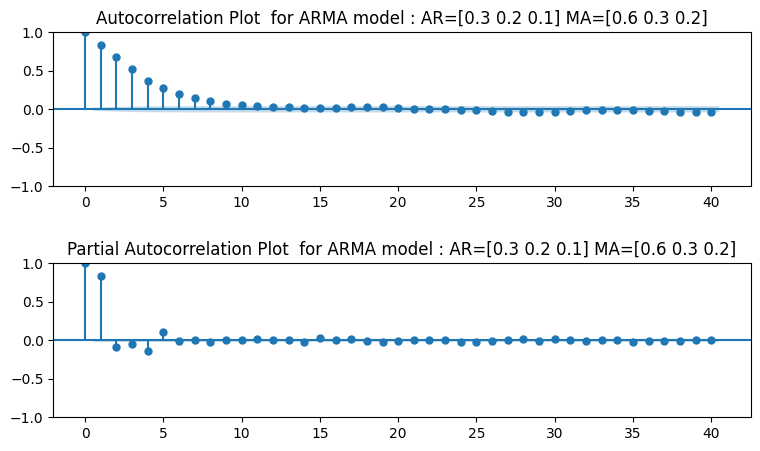

In [15]:
# setting parameters
arma_params1 = np.array([0.3, 0.2]), np.array([0.6, 0.3])
arma_params2 = np.array([0.3, 0.2, 0.1]), np.array([0.6, 0.3, 0.2]) 

# ACF and PACF plots
plot_graphs(*arma_params1)
plot_graphs(*arma_params2)

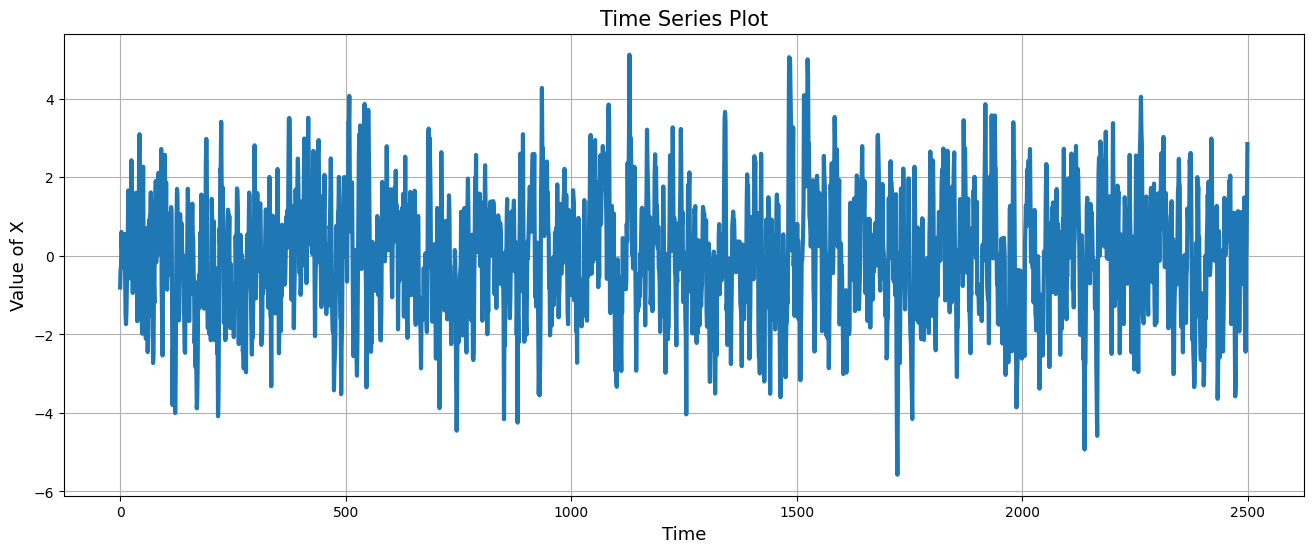

In [16]:
# Synthetic data generation
ar_params = np.array([0.3, 0.1]) 
ma_params = np.array([0.5, 0.3]) 

ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params] 

ar_process = ArmaProcess(ar, ma) 

np.random.seed(1000)
X = ar_process.generate_sample(nsample=2500)

plot_series(X)

In [17]:
# ADF test
p_threshold = 0.05
p_val = stattools.adfuller(X)[1]

print(p_val)
print(p_val < p_threshold)

2.0683524071070683e-30
True


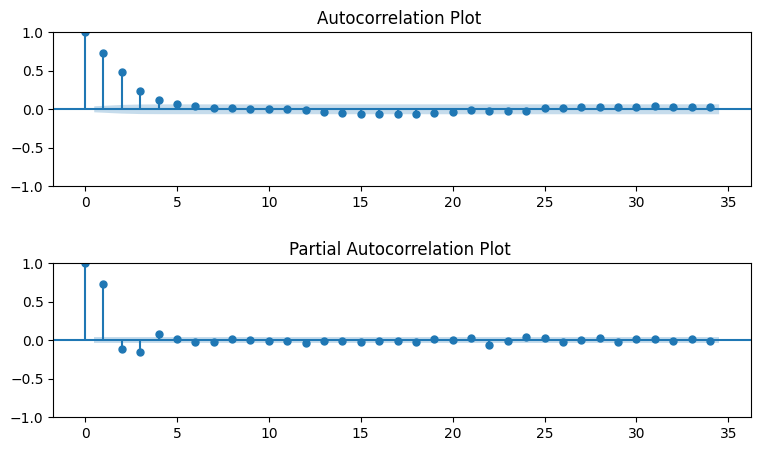

In [18]:
plot_graphs(X=X)

In [19]:
p_ = 4
q_ = 5

In [20]:
# minimization function
def f(order, X):
    """ Minimization function
        It generates a ARMA model with provided orders and fits on the time series.
        
    Args:
        order ((int, int, int, int)): Tuple of (p, q, P, Q)
        X (np.array): Time-series data
        
    Returns:
        (float or np.inf): BIC score for the model and np.inf in case of any exception
        
    """
    
    try:
        model = sm.tsa.ARMA(X, order=order).fit()
    except ValueError:
        return np.inf
    return model.bic

In [28]:
# brute force search for the order for minimum bic
ar_orders = slice(0, p_, 1)
ma_orders = slice(0, q_, 1)
order_ranges = (ar_orders, ma_orders)

min_order = optimize.brute(f, order_ranges, args=(X,), finish=None)
min_order = min_order.astype(int)
min_order

In [ ]:
p, q = min_order # array([1,2])

In [ ]:
model = sm.tsa.ARMA(X, order=(p, q)).fit()

ax = plt.figure(figsize=(10, 4)).add_subplot(111)
model.plot_predict(
    len(X) - 20, len(X) + 12, 
    dynamic=False, ax=ax, plot_insample=True
)

plt.title('Model Predictions vs Observed Values', fontsize=14)
plt.legend(['Forecasted Values', 'Observed Values', '95% confidence inteval'], fontsize=13)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Value of X', fontsize=13)

plt.grid()
plt.plot()